In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import socket, struct

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# reading the dataset from the google drive
df=pd.read_csv("/content/drive/MyDrive/CDataset-Unicauca-Version2-87Atts.csv") 

In [4]:
#function to unpack the ip address of source and destination
def ip2int(ip):
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]     

In [5]:
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,...,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,132,110414.0,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880.0,1,45523.0,2167.761905,1319.384512,5988.0,698.0,41178.0,762.555556,1230.348220,5133.0,1.0,0,0,0,0,...,1121.579194,1.257940e+06,0,0,0,0,1,0,0,0,2,1435.74026,6.000000,2007.527273,440,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,0.0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1.0,1,1.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,...,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.00000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,674,0.0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1.0,0,1.0,0.500000,0.707107,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,...,168.500000,2.839225e+04,0,1,0,0,1,0,0,0,0,337.00000,224.666667,0.000000,96,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110.0,0,0.0,0.000000,0.000000,0.0,0.0,107.0,53.500000,75.660426,107.0,0.0,0,0,0,0,...,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,3,0.00000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,3,0,888,490,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,0.0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313.0,0,78068.0,19517.000000,25758.502350,54313.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,...,286.458898,8.205870e+04,0,1,0,0,1,0,0,0,0,321.00000,215.200000,0.000000,100,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [6]:
df['Source.IP'] = df['Source.IP'].apply(ip2int)
df['Destination.IP'] = df['Destination.IP'].apply(ip2int)

In [7]:
#checking for the null values in the dataset 
df.isnull().values.any()
df.head()                        

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,...,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,2886926638,52422,180881159,3128,6,26/04/201711:11:17,45523,22,55,132,110414.0,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880.0,1,45523.0,2167.761905,1319.384512,5988.0,698.0,41178.0,762.555556,1230.348220,5133.0,1.0,0,0,0,0,...,1121.579194,1.257940e+06,0,0,0,0,1,0,0,0,2,1435.74026,6.000000,2007.527273,440,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,180881159,3128,2886926638,52422,6,26/04/201711:11:17,1,2,0,12,0.0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1.0,1,1.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,...,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.00000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,840939815,80,180881369,38848,6,26/04/201711:11:17,1,3,0,674,0.0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1.0,0,1.0,0.500000,0.707107,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,...,168.500000,2.839225e+04,0,1,0,0,1,0,0,0,0,337.00000,224.666667,0.000000,96,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,840939815,80,180881369,38848,6,26/04/201711:11:17,217,1,3,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110.0,0,0.0,0.000000,0.000000,0.0,0.0,107.0,53.500000,75.660426,107.0,0.0,0,0,0,0,...,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,3,0.00000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,3,0,888,490,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,3232253995,55961,180881159,3128,6,26/04/201711:11:17,78068,5,0,1076,0.0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313.0,0,78068.0,19517.000000,25758.502350,54313.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,...,286.458898,8.205870e+04,0,1,0,0,1,0,0,0,0,321.00000,215.200000,0.000000,100,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [8]:
print(df.dtypes)

Flow.ID              object
Source.IP             int64
Source.Port           int64
Destination.IP        int64
Destination.Port      int64
                     ...   
Idle.Max            float64
Idle.Min            float64
Label                object
L7Protocol            int64
ProtocolName         object
Length: 87, dtype: object


In [9]:
#checking for the unique values and keeping only the columns which are unique
df.columns[df.nunique() <= 1]

Index(['Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'CWE.Flag.Count',
       'Fwd.Avg.Bytes.Bulk', 'Fwd.Avg.Packets.Bulk', 'Fwd.Avg.Bulk.Rate',
       'Bwd.Avg.Bytes.Bulk', 'Bwd.Avg.Packets.Bulk', 'Bwd.Avg.Bulk.Rate',
       'Label'],
      dtype='object')

In [ ]:
df.tail(50)

SPOTIFY              1269
APPLE_ICLOUD         1200
EBAY                 1192
SSL_NO_CERT           856
GOOGLE_MAPS           807
EASYTAXI              705
TEAMVIEWER            527
HTTP_DOWNLOAD         516
MQTT                  302
TOR                   276
FTP_DATA              251
UBUNTUONE             249
NTP                   135
SSH                   102
EDONKEY                95
WAZE                   79
DEEZER                 74
UNENCRYPED_JABBER      45
CITRIX_ONLINE          38
TIMMEU                 34
UPNP                   34
TELEGRAM               33
FTP_CONTROL            25
TWITCH                 24
H323                   21
MSSQL                  21
CNN                    20
LASTFM                 18
CITRIX                 17
ORACLE                 14
TEAMSPEAK              12
BGP                    11
RTMP                   10
WHOIS_DAS              10
BITTORRENT             10
MAIL_IMAPS              9
SKINNY                  9
OPENSIGNAL              9
OSCAR       

In [10]:
# Deleting the last 25 values since it doesnt contain enough values to train
feats_toDelete = df['ProtocolName'].value_counts()[-25:].index
feats_toDelete

Index(['H323', 'CNN', 'LASTFM', 'CITRIX', 'ORACLE', 'TEAMSPEAK', 'BGP', 'RTMP',
       'WHOIS_DAS', 'BITTORRENT', 'OPENSIGNAL', 'SKINNY', 'MAIL_IMAPS',
       'OSCAR', 'LOTUS_NOTES', 'RADIUS', 'IP_OSPF', 'SIMET', 'OPENVPN', 'SNMP',
       'STARCRAFT', 'QQ', 'NFS', 'SOCKS', '99TAXI'],
      dtype='object')

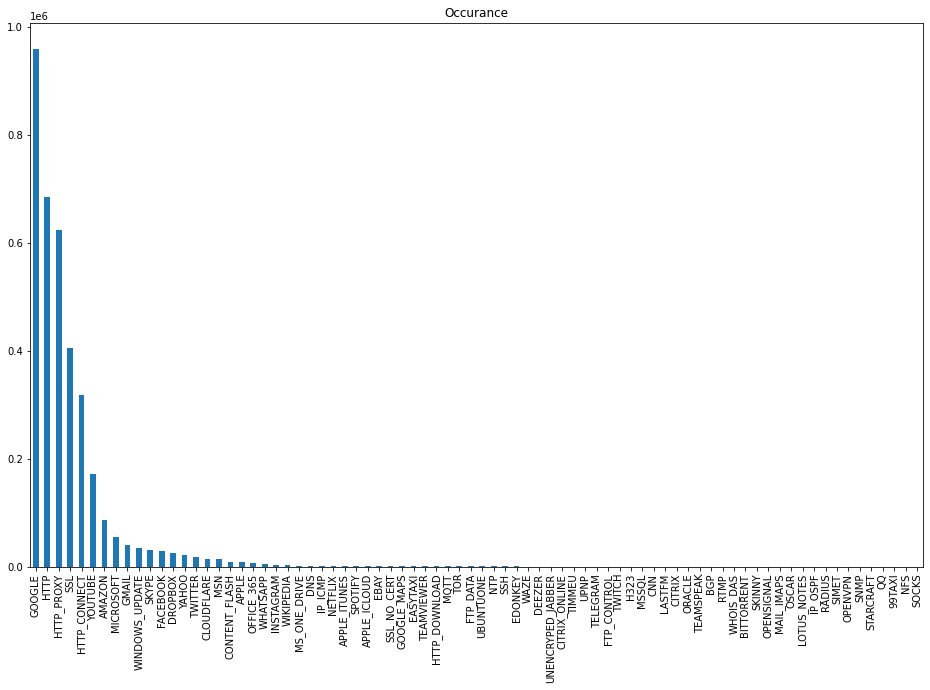

In [ ]:
# plotting the graph between the output variable and no of instances of that classes
target_count = df['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
target_count.plot(kind='bar', title='Occurance');

In [11]:
df = df[~df.ProtocolName.isin(feats_toDelete)]

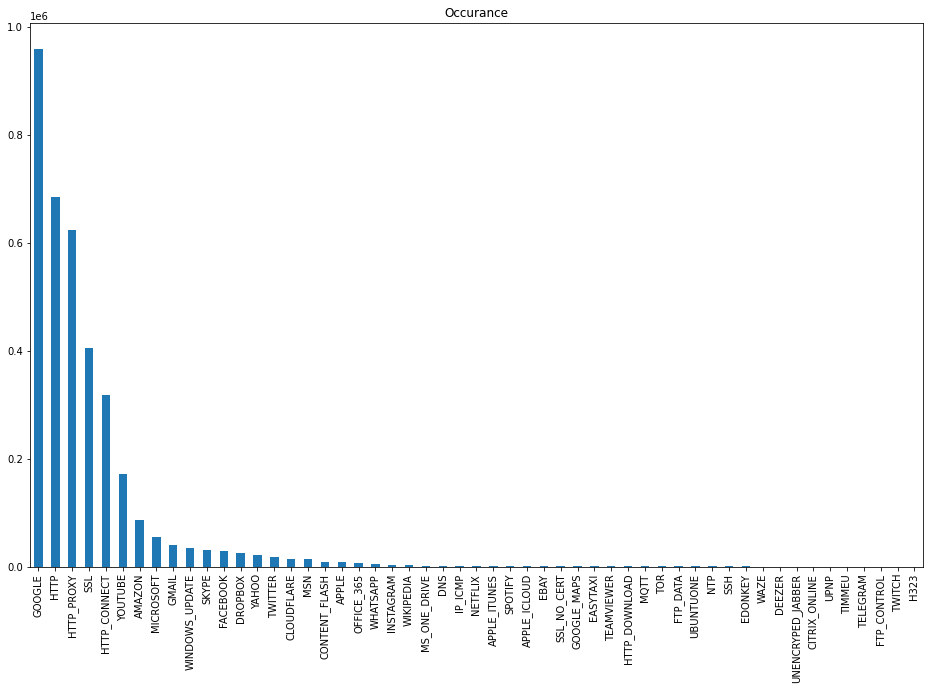

In [ ]:
target_count2 = df['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
target_count2.plot(kind='bar', title='Occurance');

In [12]:
feats = [x for x in df.columns if x != 'ProtocolName' and x!='Flow.ID' and x!='Timestamp' and x!='Label']
X = df[feats].astype(float)
Y = df['ProtocolName']

In [13]:
#label encoding the dataset
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [ ]:
print(sorted(Counter(Y).items()))

[('AMAZON', 86875), ('APPLE', 7615), ('APPLE_ICLOUD', 1200), ('APPLE_ITUNES', 1287), ('CITRIX_ONLINE', 38), ('CLOUDFLARE', 14737), ('CONTENT_FLASH', 8589), ('DEEZER', 74), ('DNS', 1695), ('DROPBOX', 25102), ('EASYTAXI', 705), ('EBAY', 1192), ('EDONKEY', 95), ('FACEBOOK', 29033), ('FTP_CONTROL', 25), ('FTP_DATA', 251), ('GMAIL', 40260), ('GOOGLE', 959110), ('GOOGLE_MAPS', 807), ('H323', 21), ('HTTP', 683734), ('HTTP_CONNECT', 317526), ('HTTP_DOWNLOAD', 516), ('HTTP_PROXY', 623210), ('INSTAGRAM', 2415), ('IP_ICMP', 1631), ('MICROSOFT', 54710), ('MQTT', 302), ('MSN', 14478), ('MS_ONE_DRIVE', 1748), ('NETFLIX', 1560), ('NTP', 135), ('OFFICE_365', 5941), ('SKYPE', 30657), ('SPOTIFY', 1269), ('SSH', 102), ('SSL', 404883), ('SSL_NO_CERT', 856), ('TEAMVIEWER', 527), ('TELEGRAM', 33), ('TIMMEU', 34), ('TOR', 276), ('TWITCH', 24), ('TWITTER', 18259), ('UBUNTUONE', 249), ('UNENCRYPED_JABBER', 45), ('UPNP', 34), ('WAZE', 79), ('WHATSAPP', 4593), ('WIKIPEDIA', 2025), ('WINDOWS_UPDATE', 34471), ('YA

In [ ]:
print(sorted(Counter(encoded_Y).items()))

[(0, 86875), (1, 7615), (2, 1200), (3, 1287), (4, 38), (5, 14737), (6, 8589), (7, 74), (8, 1695), (9, 25102), (10, 705), (11, 1192), (12, 95), (13, 29033), (14, 25), (15, 251), (16, 40260), (17, 959110), (18, 807), (19, 21), (20, 683734), (21, 317526), (22, 516), (23, 623210), (24, 2415), (25, 1631), (26, 54710), (27, 302), (28, 14478), (29, 1748), (30, 1560), (31, 135), (32, 5941), (33, 30657), (34, 1269), (35, 102), (36, 404883), (37, 856), (38, 527), (39, 33), (40, 34), (41, 276), (42, 24), (43, 18259), (44, 249), (45, 45), (46, 34), (47, 79), (48, 4593), (49, 2025), (50, 34471), (51, 21268), (52, 170781)]


In [14]:
dict_nearMiss = {
"GOOGLE":            10000,
"HTTP":              10000,
"HTTP_PROXY":        10000,
"SSL":               10000,
"HTTP_CONNECT":      10000,
"YOUTUBE":           10000,
"AMAZON":             10000,
"MICROSOFT":          10000,
"GMAIL":              10000,
"WINDOWS_UPDATE":     10000,
"SKYPE":              10000,
"FACEBOOK":           10000,
"DROPBOX":            10000,
"YAHOO":              10000,
"TWITTER":            10000,
"CLOUDFLARE":         10000,
"MSN":                10000,
}

In [15]:
dict_smote = { "CONTENT_FLASH":       10000,
"APPLE":               10000,
"OFFICE_365":        10000,
"WHATSAPP":            10000,
"INSTAGRAM":          10000,
"WIKIPEDIA":           10000,
"MS_ONE_DRIVE":        10000,
"DNS":                 10000,
"IP_ICMP":             10000,
"NETFLIX":             10000,
"APPLE_ITUNES":        10000,
"SPOTIFY":             10000,
"APPLE_ICLOUD":        10000,
"EBAY":               10000,
"SSL_NO_CERT":          10000,
"GOOGLE_MAPS":          10000,
"EASYTAXI":             10000,
"TEAMVIEWER":           10000,
"HTTP_DOWNLOAD":        10000,
"MQTT":                 10000,
"TOR":                  10000,
"FTP_DATA":             10000,
"UBUNTUONE":            10000,
"NTP":                  10000,
"SSH": 10000}
print(dict_smote)

{'CONTENT_FLASH': 10000, 'APPLE': 10000, 'OFFICE_365': 10000, 'WHATSAPP': 10000, 'INSTAGRAM': 10000, 'WIKIPEDIA': 10000, 'MS_ONE_DRIVE': 10000, 'DNS': 10000, 'IP_ICMP': 10000, 'NETFLIX': 10000, 'APPLE_ITUNES': 10000, 'SPOTIFY': 10000, 'APPLE_ICLOUD': 10000, 'EBAY': 10000, 'SSL_NO_CERT': 10000, 'GOOGLE_MAPS': 10000, 'EASYTAXI': 10000, 'TEAMVIEWER': 10000, 'HTTP_DOWNLOAD': 10000, 'MQTT': 10000, 'TOR': 10000, 'FTP_DATA': 10000, 'UBUNTUONE': 10000, 'NTP': 10000, 'SSH': 10000}


In [16]:
#balancing the dataset to some extent by using smote and nearmiss
pipe = make_pipeline(
    SMOTE(sampling_strategy=dict_smote),
    NearMiss(sampling_strategy=dict_nearMiss)
)


In [ ]:
X_resampled, y_resampled = pipe.fit_resample(X, Y)


In [ ]:
print("Total Shape " + str(df.shape))
print("Shape X " + str(X.shape))
print("Shape X_resampled" + str(X_resampled.shape))
print("Shape Y " + str(Y.shape))
print("Shape y_resampled" + str(y_resampled.shape))

In [ ]:
new_dataframe = pd.DataFrame(data = X_resampled, columns = feats)

In [ ]:
new_dataframe['ProtocolName'] = y_resampled

In [ ]:

new_dataframe.describe()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,...,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
count,4.205020e+05,420502.000000,4.205020e+05,420502.000000,420502.000000,4.205020e+05,420502.000000,420502.000000,4.205020e+05,4.205020e+05,420502.000000,420502.000000,420502.000000,420502.000000,420502.000000,420502.000000,420502.000000,420502.000000,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,420502.000000,420502.0,420502.0,420502.0,4.205020e+05,4.205020e+05,...,420502.000000,420502.000000,420502.000000,4.205020e+05,420502.000000,420502.000000,420502.000000,420502.000000,420502.000000,420502.000000,420502.0,420502.000000,420502.000000,420502.000000,420502.000000,420502.000000,4.205020e+05,420502.0,420502.0,420502.0,420502.0,420502.0,420502.0,420502.000000,4.205020e+05,420502.000000,4.205020e+05,420502.000000,420502.000000,420502.000000,420502.000000,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,420502.000000
mean,1.722206e+09,41186.631616,1.061306e+09,4282.289605,6.358313,1.688350e+07,110.638181,94.071052,6.659018e+04,4.837983e+04,453.400877,9.013614,96.552465,129.390259,975.040608,9.542209,234.788038,292.481896,1.625842e+06,4.854999e+04,1.083663e+06,2.258290e+06,9.180863e+06,2.901899e+05,1.543586e+07,1.870561e+06,2.706600e+06,7.979371e+06,5.041639e+05,1.273954e+07,1.144457e+06,1.765832e+06,5.719597e+06,2.930285e+05,0.090105,0.0,0.0,0.0,2.990835e+03,2.612848e+03,...,1176.863954,167.746923,279.879387,2.484445e+05,0.006186,0.090105,0.001962,0.437417,0.494194,0.282023,0.0,0.001960,0.908941,176.979001,96.552465,234.788038,2.990835e+03,0.0,0.0,0.0,0.0,0.0,0.0,110.638181,6.659018e+04,94.071052,4.837983e+04,13281.700416,1522.871860,92.562286,25.418558,4.377280e+05,1.315900e+05,5.988819e+05,3.397410e+05,5.121261e+06,5.407298e+05,5.620554e+06,4.665248e+06,131.661077
std,1.514578e+09,19787.777593,1.245740e+09,10847.328397,2.497317,3.355694e+07,1132.833601,959.822488,1.298006e+06,1.368240e+06,1434.720279,60.554471,233.188771,248.173843,1836.486534,83.542762,420.286818,462.210462,5.132382e+07,2.943213e+05,4.086063e+06,5.408911e+06,1.900160e+07,3.318046e+06,3.277348e+07,6.105187e+06,7.075343e+06,1.784485e+07,4.476262e+06,3.176728e+07,5.039639e+06,5.737031e+06,1.570010e+07,3.785278e+06,0.278152,0.0,0.0,0.0,3.161129e+04,2.581293e+04,...,2227.204970,263.530858,404.917791,6.318840e+05,0.075805,0.278152,0.040056,0.490495,0.494584,0.445069,0.0,0.040027,1.228438,272.224947,233.188771,420.286818,3.161129e+04,0.0,0.0,0.0,0.0,0.0,0.0,1132.833601,1.298006e+06,959.822488,1.368240e+06,18614.602461,5389.877075,1007.595090,7.091595,3.61875

In [ ]:
#New dataframe which is preprocessed and ready for appplying algorithms
new_dataframe.to_csv('/content/sample_data/finalbalanced.csv', index=False)

In [ ]:
##FINISHED